# Wrangle & Analyze "WeRateDogs" Data
Udacity Data Analyst Nanodegree Project 4

## Table of Contents
- [1. Introduction](#1.intro)
- [2. Gathering Data](#2.Gathering_Data)
    - [2.1 WeRateDogs Twitter archive](#2.1WeRateDogs_Twitter_archive)
    - [2.2 Tweet image predictions](#2.2Tweet_image_predictions)
    - [2.3 Twitter API file](#2.3Twitter_API_file)
    - [2.4 Summary of gathered data](#2.4Summary_of_gathered_data)
- [3. Assessing Data](#3.Assessing_Data)
    - [3.1 t_arc dataset (WeRateDogs Twitter archive)](#3.1t_arc_dataset)
    - [3.2 i_pred dataset (Tweet image predictions)](#3.2i_pred_dataset)
    - [3.3 t_api dataset (Twitter API dataset)](#3.3t_api_dataset)
- [4.Cleaning Data](#4.Cleaning_Data)
    - [4.1 t_arc dataset (WeRateDogs Twitter archive)](#4.1t_arc_dataset)
    - [4.2 i_pred dataset (Tweet image predictions)](#4.2i_pred_dataset)
    - [4.3 t_api dataset (Twitter API dataset)](#4.3t_api_dataset)
    - [4.4 Merging Datasets](#4.4merging_datasets)
- [5.Storing Clean DataFrame](#5.Storing_Clean_DataFrame)
- [6.Analyzing and Visualizing Data](#6.Analyzing_and_Visualizing_Data)
    - [6.1 Investigating WeRateDogs Twitter popularity over time](#6.1)
    - [6.2 Investigating the relationship between dog stage and dog rating](#6.2)
    - [6.3 Investigating the relationship between dog breed and the number of retweets and favourites](#6.3)
 

<a id='1.intro'></a>
## 1. Introduction

This is a data wrangling project. Using Python and its libraries, data was gathered from a variety of sources and in a variety of formats. Then, its quality and tidiness were assessed. Finally, data was cleaned to prepare it for analysis. 

The dataset to be wrangled (and later analysed with visualisations) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs, Brent." WeRateDogs has over 4 million followers and has received international media coverage. 

### Loading packages and Jupyter Notebook settings

In [1]:
import numpy as np
import pandas as pd
import requests
import json
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import warnings

In [2]:
# ignore the warnings in jupyter notebook
warnings.filterwarnings('ignore')

# pandas settings to view more characters in text columns
pd.set_option('display.max_colwidth', -1)

<a id='2.Gathering_Data'></a>
## 2. Gathering Data
For this project, three main pieces of data will be collected. They are described below.

<a id='2.1WeRateDogs_Twitter_archive'></a>
### 2.1 WeRateDogs Twitter archive
**This file was manually downloaded from Udacity's website and is considered to be a file on hand.**

It contains basic tweet data for all 5000+ of WeRateDogs's tweets, but not everything. More specifically, it contains each tweet's text, rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo). Of the 5000+ tweets, this file only contains tweets with ratings (a total of 2356 tweets).

In [3]:
# loading twitter archive
t_arc = pd.read_csv('twitter-archive-enhanced.csv')
t_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


<a id='2.2Tweet_image_predictions'></a>
### 2.2 Tweet image predictions

**This file is hosted on Udacity's servers and was downloaded programmatically using the `requests` library.**

This file contains what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network that can classify breeds of dogs. It contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponds to the most confident prediction.

In [4]:
# downloading the TSV file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
responce = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(responce.content)

In [5]:
# reading the download file
i_pred = pd.read_csv('image-predictions.tsv', sep='\t')
i_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='2.3Twitter_API_file'></a>
### 2.3 Twitter API file
**This file was manually downloaded from Udacity's website.**

Usually, this data is obtained using Twitter's API; however, to make sure that the project could be completed with the exact required data, the provided JSON file was used instead. This file was provided by Udacity and contains the same data that would otherwise be obtained from an API. More specifically, the retweet count and favourite count for each tweet will be extracted from this file.

In [6]:
# loading twitter API data
with open('tweet-json.txt', 'r') as f:
    t_api_all = pd.DataFrame(json.loads(line) for line in f)
t_api_all.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145

In [7]:
# checking for the required columns
t_api_all.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
# creating a data frame with only the required columns
t_api = t_api_all[['id', 'retweet_count', 'favorite_count']]

# renaming columns
t_api.rename(columns = {'id':'tweet_id'}, inplace = True)
t_api.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [9]:
t_api.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

<a id='2.4Summary_of_gathered_data'></a>
### 2.4 Summary of gathered data

1. **t_arc** dataframe
* This is the "twitter-archive-enhanced.csv" dataset containing information on basic tweet data.
* This dataframe has the following columns:
    * **tweet_id**: the integer representation of the unique identifier for this tweet.
    * **in_reply_to_status_id**: if the represented tweet is a reply, this field will contain the integer representation of the original tweet’s ID.
    * **in_reply_to_user_id**:  if the represented tweet is a reply, this field will contain the integer representation of the original tweet’s author ID. 
    * **timestamp**: UTC time when this tweet was created.
    * **source**: utility used to post the tweet, as an HTML-formatted string.
    * **text**: the corresponding tweet's text.
    * **retweeted_status_id**: the status id for the reply given to the tweet id i.e., for the retweeted id.
    * **retweeted_status_user_id**: the status id for the reply given to the tweet id i.e., for the retweeted id.
    * **retweeted_status_timestamp**: UTC time when this retweet was created.
    * **expanded_urls**: Expanded version of url1; URL entered by user and displayed in Twitter.
    * **rating_numerator**: the numerator of the rank given by WeRateDogs.
    * **rating_denominator**: the denominator of the rank given by WeRateDogs.
    * **name**: the name of the dog in the tweet.
    * **doggo**, **floofer**, **pupper**, **puppo**: the stage of the dog in the tweet.


2. **i_pred** dataframe
* This is the "image-predictions.tsv" dataset contianing the breed of dog prediction according to a neural network
* This dataframe has the following columns:
    * **tweet_id**: the integer representation of the unique identifier for this tweet.
    * **jpg_url**: tweet's image URL.
    * **img_num**: image number.
    * **p1**: the algorithm's **first** prediction for the image in the tweet.
    * **p1_conf**: the confidence of the **first** prediction.
    * **p1_dog**: whether or not the **first**  prediction is a dog breed.
    * **p2**: the algorithm's **second** prediction for the image in the tweet.
    * **p2_conf**: the confidence of the **second** prediction.
    * **p2_dog**: whether or not the **second**  prediction is a dog breed.
    * **p3**: the algorithm's **third** prediction for the image in the tweet.
    * **p3_conf**: the confidence of the **third** prediction.
    * **p3_dog**: whether or not the **third**  prediction is a dog breed.


3. **t_api** dataframe
* This is the twitter api dataset containing additional information about retweet and favourite count
* This dataframe has the following columns:
    * **tweet_id**: the integer representation of the unique identifier for this tweet.
    * **retweet_count**: the number of retweets this tweet has.
    * **favorite_count**: the number of favourites this tweet has.

<a id='3.Assessing_Data'></a>
## 3. Assessing Data
The goal of this section is to assess the datasets visually and programmatically for quality and tidiness issues detecting and documenting at least eight (8) quality issues and two (2) tidiness issues.

<a id='3.1t_arc_dataset'></a>
### 3.1 `t_arc` dataset (WeRateDogs Twitter archive)

In [10]:
# visual assessment of the whole data frame
t_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [11]:
# checking the shape of the data frame
t_arc.shape

(2356, 17)

In [12]:
# checking 5 random samples of data
t_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kramer. He's a Picasso Tortellini. Tie couldn't be more accurate. Confident af. Runs his own business. 10/10 https://t.co/jIcVW0xxmH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506001633280/photo/1,10,10,Kramer,None,None,None,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614829678593/photo/1,10,10,None,None,None,pupper,None
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",All hail sky doggo. 13/10 would jump super high to pet https://t.co/CsLRpqdeTF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248105566208/photo/1,13,10,None,doggo,None,None,None
524,809220051211603969,NaN,NaN,2016-12-15 02:14:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionately https://t.co/wHu15q2Q6p,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1",12,10,Kyro,None,None,None,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a Timbuk Slytherin. Eats his pizza from the side first. Crushed that cup with his bare paws 9/10 https://t.co/fvxHL6cRRs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477930868736/photo/1,9,10,Jerry,None,None,None,None


In [13]:
# checking that only retweets have 'retweeted_status_user_id'
t_arc.retweeted_status_id.isnull().sum() == t_arc.retweeted_status_user_id.isnull().sum()

True

In [14]:
# checking that only retweets have 'retweeted_status_timestamp'
t_arc.retweeted_status_id.isnull().sum() == t_arc.retweeted_status_timestamp.isnull().sum()

True

In [15]:
# the overview of the data in the data frame
t_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# checking for duplicates using tweet_id
t_arc[t_arc.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
# looking at descrptive statistics of specific numerical variables
t_arc[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
# checking rating_denominators
t_arc.rating_denominator.value_counts()

10     2333
11     3   
50     3   
20     2   
80     2   
0      1   
120    1   
7      1   
170    1   
150    1   
130    1   
90     1   
110    1   
2      1   
70     1   
40     1   
16     1   
15     1   
Name: rating_denominator, dtype: int64

In [19]:
# checking ratings with denominator 0
t_arc[t_arc.rating_denominator == 0][['text', 'rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0


In [20]:
# checkng ratings with denominator bigger than 10
t_arc[t_arc.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [21]:
# table of tweets with wrong denominator
wrong_denominator = t_arc.iloc[[313, 1068, 1165, 1202, 1662]]
wrong_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None


In [22]:
# checking rating_numerators
t_arc.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
0       2  
15      2  
75      2  
420     2  
182     1  
204     1  
143     1  
121     1  
99      1  
20      1  
45      1  
27      1  
17      1  
24      1  
26      1  
44      1  
50      1  
60      1  
80      1  
84      1  
88      1  
1776    1  
960     1  
666     1  
144     1  
165     1  
Name: rating_numerator, dtype: int64

In [23]:
# checking ratings with numerator 0
t_arc[t_arc.rating_numerator == 0][['text', 'rating_numerator']]

,text,rating_numerator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0


In [24]:
# checking abnormal ratings
t_arc[t_arc.rating_numerator > 13][['text', 'rating_numerator']].sort_values('rating_numerator')

,text,rating_numerator
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14
339,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,14
347,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg,14
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14
372,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,14
...,...,...
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960


In [25]:
t_arc.iloc[313]

tweet_id                      835246439529840640                                                                                
in_reply_to_status_id         835245984028504064.0                                                                              
in_reply_to_user_id           26259576.0                                                                                        
timestamp                     2017-02-24 21:54:03 +0000                                                                         
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                
text                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
retweeted_status_id           NaN                                                                                               
retweeted_status_user_id      NaN                                                                

In [26]:
# checking unique dog names
t_arc.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [27]:
# checking the name of dogs
t_arc.name.value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Oliver      11 
            .. 
Marty       1  
Clifford    1  
Blu         1  
Tiger       1  
Mya         1  
Name: name, Length: 957, dtype: int64

In [28]:
# checking tweets with no dog names
t_arc[t_arc['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [29]:
t_arc[t_arc.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [30]:
# checking if dogs have more than one assigned category
dog_stages = list(t_arc.columns[-4:])
t_arc2 = t_arc.copy()

for dog_stage in dog_stages:
    t_arc2[dog_stage] = t_arc2[dog_stage].apply(lambda x: 0 if x == 'None' else 1)

t_arc2['total_stages'] = t_arc2[dog_stages].sum(axis=1)
t_arc2['total_stages'].value_counts()

0    1976
1    366 
2    14  
Name: total_stages, dtype: int64

In [31]:
# checking whether there were no dog stage assigned in the text
t_arc2.query("total_stages == 0")[['tweet_id','text']]

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


In [32]:
# checking whether there were actually two stages assigned in the text
t_arc2.query("total_stages > 1")[['tweet_id','text']]

,tweet_id,text
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze"
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u"
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda"
822,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC


**Quality**
* t_arc dataset contains retweets, while only the original tweets should be considered for analysis. The retweets should be deleted.
* `tweet_id` is wrong data type. It is int64, and it should be string. 
* `timestamp` is wrong data type. It is string (object), and it should be DateTime.
* `rating_denominator` contains one value of 0 and other inconsistent values with the text of the tweet. They are shown in the `wrong_denominator` table.
* tweet with tweet_id:835246439529840640 has wrong `rating_numerator`. It should be 13.
* There are non-dog names in name column such as 'a', 'such', 'the', 'just', 'getting' and etc. These should be changed to Null.
* Records with no dog names in  `name` column should store Null values instead of the 'None' string.
* Records with no dog stages `doggo`, `floofer`, `pupper` and `puppo` should store Null values instead of the 'None' string.
* Some tweets mention 2 dog stages instead of 1. Despite some of the tweets mentioning two dogs, a single-stage should be assigned for ease of analysis 

**Tidiness**
* While the dataset contains `rating_denominator` and `rating_numerator`columns it does not actually contain a rating column. This column should be added.
* Dog 'stage' classification is 4 distinct columns: `doggo`, `floofer`, `pupper` or `puppo`. This should be only one column.

<a id='3.2i_pred_dataset'></a>
### 3.2  `i_pred` dataset (Tweet image predictions)

In [33]:
# visual assessment of the whole data frame
i_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [34]:
# checking the shape of the data frame
i_pred.shape

(2075, 12)

In [35]:
# checking a sample of 5 random records
i_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
1218,743609206067040256,https://pbs.twimg.com/media/ClHUkhQWAAAy7Yj.jpg,3,Weimaraner,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True
1798,831650051525054464,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,1,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,0.047662,True


In [36]:
# the overview of the data in the data frame
i_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
# checking for duplicates
i_pred[i_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Quality**
* `tweet_id` is wrong data type. It is int64, and it should be string
* Formatting of the predicted dog breed in prediction columns (`p1`, `p2`, `p3`) varies. A single lowercase formatting should be used.
* Since some of the algorithm's prediction are not even a dog breed, only the breed with the highest confidence should be kept.
* Prediction column names are confusing. They should be renamed.
* Only 2075 tweets have predictions. This is less than the number of tweets in the Twitter archive dataset.  

**Tidiness**
* This dataset should be merged with the main Twitter archive dataset.

<a id='3.3t_api_dataset'></a>
### 3.3  `t_api` dataset (Twitter API dataset)

In [38]:
# visual assessment of the whole data frame
t_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [39]:
# checking the shape of the data frame
t_api.shape

(2354, 3)

In [40]:
# checking a sample of 5 random records
t_api.sample(5)

,tweet_id,retweet_count,favorite_count
1801,676948236477857792,980,2354
1424,697881462549430272,1337,3313
85,875747767867523072,4497,25773
386,826598799820865537,292,5637
1993,672594978741354496,661,1411


In [41]:
# the overview of the data in the data frame
t_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [42]:
# checking for duplicates
i_pred[i_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Quality**
* `tweet_id` is wrong data type. It is int64, and it should be string.
* The dataset contains 2354 records compared to 2356 records in the archive.

**Tidiness**
* This dataset should be merged with the other two datasets.

<a id='4.Cleaning_Data'></a>
## 4. Cleaning Data
Cleaning the documented issues in the previous section

In [43]:
# Creating copies of all datasets
t_arc_clean = t_arc.copy()
t_api_clean = t_api.copy()
i_pred_clean = i_pred.copy()

<a id='4.1t_arc_dataset'></a>
### 4.1 `t_arc` dataset (WeRateDogs Twitter archive)
**The following issues are addressed in this section:**

1. [**Section 4.1.1**](#4.1.1) `timestamp` is wrong data type. It is string (object), and it should be DateTime.
2. [**Section 4.1.2**](#4.1.2) `rating_denominator` contains one value of 0 and other inconsistent values with the text of the tweet. They are shown in the `wrong_denominator` table.
3. [**Section 4.1.3**](#4.1.3) tweet with tweet_id:835246439529840640 has wrong `rating_numerator`. It should be 13.
4. [**Section 4.1.4**](#4.1.4) While the dataset contains `rating_denominator` and `rating_numerator`columns it does not actually contain a rating column. This column should be added.
5. [**Section 4.1.5**](#4.1.5) There are non-dog names in name column such as 'a', 'such', 'the', 'just', 'getting' and etc. These should be changed to Null.
6. [**Section 4.1.6**](#4.1.6):
    * Records with no dog names in  `name` column should store Null values instead of the 'None' string.
    * Records with no dog stages `doggo`, `floofer`, `pupper` and `puppo` should store Null values instead of the 'None' string.

7. [**Section 4.1.7**](#4.1.7):
    * Dog 'stage' classification is 4 distinct columns: `doggo`, `floofer`, `pupper` or `puppo`. This should be only one column.
    * Some tweets mention 2 dog stages instead of 1. Despite some of the tweets mentioning two dogs, a single stage should be assigned for ease of analysis 

8. [**Section 4.1.8**](#4.1.8) t_arc dataset contains retweets, while only the original tweets should be considered for analysis. The retweets should be deleted.

**Addressed in section 4.4**
* `tweet_id` is wrong data type. It is int64, and it should be string. 

In [44]:
# visualisng a sample from the dataframe as a reminder
t_arc_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remy. He has some long ass ears (probably magical). Also very proud of broken stick. 10/10 such a good boy https://t.co/EZx0YjPjPK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/737826014890496000/photo/1,https://twitter.com/dog_rates/status/737826014890496000/photo/1",10,10,Remy,None,None,None,None
175,857989990357356544,NaN,NaN,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rosie. She was just informed of the walk that's about to happen. Knows there are many a stick along the way. 12/10 such excite https://t.co/sOl7cFaP5X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857989990357356544/photo/1,12,10,Rosie,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a dog enjoying a sunset. 11/10 would trade lives with https://t.co/VsQdLxrv9h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827381944320/photo/1,11,10,None,None,None,None,None
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chipson. He weighed in at .3 ounces and is officially super h*ckin smol. Space-saving af. 11/10 would snug delicately https://t.co/FjEsk7A1JV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203444699136/photo/1,11,10,Chipson,None,None,None,None
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brownie. She's wearing a Halloween themed onesie. 12/10 festive af https://t.co/0R4meWXFOx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789599242079838210/photo/1,https://twitter.com/dog_rates/status/789599242079838210/photo/1",12,10,Brownie,None,None,None,None


----

<a id='4.1.1'></a>
### 4.1.1 Changing  `timestamp` column to DateTime

* `timestamp` is wrong data type. It is string (object), and it should be DateTime.

The timestamp represents time data, and therefore it should not be stored as a string but rather as a DateTime data type.

#### Define

Convert the datatype of 'timestamp' column into DateTime using `pd.to_datetime`.

#### Code

In [45]:
t_arc_clean.timestamp = pd.to_datetime(t_arc_clean.timestamp)

#### Test

In [46]:
print(t_arc_clean.dtypes['timestamp'])

datetime64[ns, UTC]


----

<a id='4.1.2'></a>
### 4.1.2 Changing `rating_denominator` values

* `rating_denominator` contains one value of 0 and other inconsistent values with the text of the tweet. They are shown in the `wrong_denominator` table

Some ratings in the `rating_denominator` column relate to other numerical values within the tweet. They are shown in the `wrong_denominator` table

#### Define
Manually change the values of denominators for tweets in the `wrong_denominator` table by checking the associated tweet text. 

### Code

In [47]:
wrong_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None


In [48]:
wrong_denominator.index

Int64Index([313, 1068, 1165, 1202, 1662], dtype='int64')

In [49]:
t_arc_clean.rating_denominator.iloc[313] = 10
t_arc_clean.rating_denominator.iloc[1068] = 10
t_arc_clean.rating_denominator.iloc[1165] = 10
t_arc_clean.rating_denominator.iloc[1202] = 10
t_arc_clean.rating_denominator.iloc[1662] = 10

#### Test

In [50]:
t_arc_clean[t_arc_clean['tweet_id'].isin(wrong_denominator.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,10,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,10,Darrel,None,None,None,None


---

<a id='4.1.3'></a>
### 4.1.3 Changing `rating_numerator` for tweet 'tweet_id:835246439529840640'
* tweet with tweet_id:835246439529840640 has wrong `rating_numerator`. It should be 13.

#### Define
Manually change the value of the rating numerator to 13.

#### Code

In [51]:
t_arc_clean.rating_numerator.iloc[313] = 13

#### Test

In [52]:
t_arc_clean.iloc[313]

tweet_id                      835246439529840640                                                                                
in_reply_to_status_id         835245984028504064.0                                                                              
in_reply_to_user_id           26259576.0                                                                                        
timestamp                     2017-02-24 21:54:03+00:00                                                                         
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                
text                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
retweeted_status_id           NaN                                                                                               
retweeted_status_user_id      NaN                                                                

----

<a id='4.1.4'></a>
### 4.1.4 Creating the 'dog_rating' column

* While the dataset contains `rating_denominator` and `rating_numerator`columns it does not actually contain a rating column. This column should be added.

#### Define 
Create a new column by dividng the `rating_denominator` column by `rating_numerator` column. Then drop those columns.

#### Code

In [53]:
t_arc_clean['dog_rating'] = t_arc_clean['rating_numerator'] / t_arc_clean['rating_denominator']

In [54]:
t_arc_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [55]:
t_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


----

<a id='4.1.5'></a>
### 4.1.5 Replacing the non-dog names in the `name` column with Null.
* There are non-dog names in name column such as 'a', 'such', 'the', 'just', 'getting' and etc. These should be changed to Null.

This was probably due to regular expression query picking up those random words after 'this is' or 'here is.'
Furthermore, all the random non-dog names are lower case while the true dog names are upper case. 

#### Define
Replace all the lower case non-dog names with null values in the `name` column.

#### Code

In [56]:
mask = t_arc_clean.name.str.islower() 
column_name = 'name' 
t_arc_clean.loc[mask, column_name] = np.nan

#### Test

In [57]:
t_arc_clean.name.str.islower().sum()

0

In [58]:
# testing that there are no more 'a' non-dog names that were the most abundant
t_arc_clean[t_arc_clean['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating


---

### <a id='4.1.6'></a>
### 4.1.6 Replacing the 'None' string with Null values in `name`, `doggo`, `floofer`, `pupper` and `puppo` columns

* Records with no dog names in  `name` column should store Null values instead of the 'None' string.
* Records with no dog stages `doggo`, `floofer`, `pupper` and `puppo` should store Null values instead of the 'None' string.



**Define**

For name and every dog stage column replace the string 'None' with Numpy's NaN using `np.nan`

**Code**

In [59]:
t_arc_clean.columns[-6:-1]

Index(['name', 'doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [60]:
# list of all the required columns
none_columns = list(t_arc_clean.columns[-6:-1])

# replacing the None values with 'NaN'
for column in none_columns:
    t_arc_clean[column].replace('None', np.nan, inplace=True)

**Test**

In [61]:
t_arc_clean[none_columns].sample(5)

,name,doggo,floofer,pupper,puppo
1673,Todo,NaN,NaN,NaN,NaN
207,Jarod,NaN,NaN,NaN,NaN
511,Ted,NaN,NaN,NaN,NaN
897,Spencer,NaN,NaN,NaN,NaN
2349,NaN,NaN,NaN,NaN,NaN


----

### <a id='4.1.7'></a>
### 4.1.7 Creating a single column for dog stage

* Dog 'stage' classification is 4 distinct columns: `doggo`, `floofer`, `pupper` or `puppo`. This should be only one column.
* Some tweets mention 2 dog stages instead of 1. Despite some of the tweets mentioning two dogs, a single stage should be assigned for ease of analysis 


#### Define

Assign the dog_stage for every record based on the contents of `doggo`, `floofer`, `pupper` and `puppo`columns. `melt()` cound be used for this rearangement. However, if that method is used it will create 4 duplicates of each row and since not every tweet assigned a dog stage, dulicates would have to be dropped manually.

**Note**: A single-stage will be assigned to the tweets with two stages. While those tweets indeed mention two dogs, and a list for those tweets could be assigned, the dogs in those tweets do not always have the same rating. Therefore, duplicate records would have to be created. Nevertheless, there are only 14 of those tweets, and a single-stage (the first one) will be assigned to the tweet for easiness of later analysis.

#### Code

In [62]:
dog_stage = []

for index, row in t_arc_clean.iterrows():
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
        continue
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
        continue
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
        continue
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        continue
    else:
        dog_stage.append(np.nan)

        
t_arc_clean['dog_stage'] = dog_stage

In [63]:
t_arc_clean.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace= True)

**Test**

In [64]:
t_arc_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_rating,dog_stage
1630,684538444857667585,6.844811e+17,4.196984e+09,2016-01-06 00:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After watching this video, we've determined that Pippa will be upgraded to a 12/10. Please enjoy https://t.co/IKoRK4yoxV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684538444857667585/video/1,NaN,1.2,NaN
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cal. He's a Swedish Geriatric Cheddar. Upset because the pope is laughing at his eyebrows. 9/10 https://t.co/EW4MsOrF5O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792075620352/photo/1,Cal,0.9,NaN
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697422163968/photo/1,Chip,0.8,NaN
2007,672264251789176834,NaN,NaN,2015-12-03 04:01:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672264251789176834/photo/1,Kreg,1.0,NaN
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leonidas. He just got rekt by a snowball. 9/10 doggy down https://t.co/uNrmYDUa9M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509974827008/photo/1,Leonidas,0.9,NaN


In [65]:
t_arc_clean.dog_stage.value_counts()

pupper     245
doggo      97 
puppo      29 
floofer    9  
Name: dog_stage, dtype: int64

In [66]:
t_arc_clean.shape[0] == t_arc.shape[0]

True

----

<a id='4.1.8'></a>
### 4.1.8 Removing retweets
* t_arc dataset contains retweets, while only the original tweets should be considered for analysis. The retweets should be deleted.

#### Define

The clean dataframe will only include records that do not have `retweeted_status_id`.

#### Code

In [67]:
t_arc_clean = t_arc_clean[t_arc_clean.retweeted_status_id.isnull()]

#### Test

In [68]:
t_arc.retweeted_status_id.isnull().sum() == t_arc_clean.shape[0]

True

In [69]:
t_arc_clean[['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   retweeted_status_id         0 non-null      float64
 1   retweeted_status_user_id    0 non-null      float64
 2   retweeted_status_timestamp  0 non-null      object 
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


<a id='4.2i_pred_dataset'></a>
### 4.2  `i_pred` dataset (Tweet image predictions)

**The following issues are addressed in this section:**
1. [**Section 4.2.1**](#4.2.1) Formatting of the predicted dog breed in prediction columns (`p1`, `p2`, `p3`) varies. A single lowercase formatting should be used.
2. [**Section 4.2.2**](#4.2.2) Since some of the algorithm's prediction are not even a dog breed, only the breed with the highest confidence should be kept.
3. [**Section 4.2.3**](#4.2.3) Prediction column names are confusing. They should be renamed.

**Addressed in section 4.4**
* `tweet_id` is wrong data type. It is int64, and it should be string. 
* Only 2075 tweets have predictions. This is less than the number of tweets in the Twitter archive dataset.
* This dataset should be merged with the main twitter archive dataset

In [70]:
# visualisng a sample from the dataframe as a reminder
i_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,Labrador_retriever,0.315163,True,golden_retriever,0.153210,True,Pekinese,0.132791,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
165,668979806671884288,https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg,1,golden_retriever,0.608537,True,Irish_setter,0.097078,True,redbone,0.076022,True
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True


---

<a id='4.2.1'></a>
### 4.2.1 Changing the formatting in prediction columns (`p1`, `p2`, `p3`) to lower case

* Formatting of the predicted dog breed in prediction columns (`p1`, `p2`, `p3`) varies. A single lowercase formatting should be used.

#### Define

Change the formatting for all records in all three columns to lower case using `.lower()`

#### Code

In [71]:
pred_columns = ['p1', 'p2', 'p3']

for column in pred_columns:
    i_pred_clean[column]= i_pred_clean[column].str.replace('_', ' ').str.lower()

#### Test

In [72]:
i_pred_clean[pred_columns].sample(5)

,p1,p2,p3
856,weasel,toy poodle,scottish deerhound
1217,hippopotamus,hog,warthog
657,seat belt,lakeland terrier,airedale
660,wombat,koala,beaver
224,irish terrier,briard,soft-coated wheaten terrier


---

<a id='4.2.2'></a>
### 4.2.2 Assigning a single dog breed prediction based on the confidence level
* Since some of the algorithm's prediction are not even a dog breed, only the breed with the highest confidence should be kept.

#### Define
Create a new column to store the dog breed that was predicted with the most confidence. If all 3 predictions are False, a Null value will be stored.

#### Code

In [73]:
dog_breed = []
dog_breed_conf = []
for index, row in i_pred_clean.iterrows():
    confidence = dict()
    if row['p1_dog'] == True:
        confidence[row['p1']] = row['p1_conf']
    if row['p2_dog'] == True:
        confidence[row['p2']] = row['p2_conf']
    if row['p3_dog'] == True:
        confidence[row['p3']] = row['p3_conf']
    try:
        max_breed = max(confidence)
        max_conf = max(confidence.values())
    except:
        # In case none of the predictions are dog breeds
        max_breed = np.nan
        max_conf = np.nan
    dog_breed.append(max_breed)
    dog_breed_conf.append(max_conf)

In [74]:
i_pred_clean['dog_breed'] = dog_breed
i_pred_clean['dog_breed_conf'] = dog_breed_conf

#### Test

In [75]:
i_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,dog_breed_conf
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy poodle,0.013544,True,toy poodle,0.956565
308,671536543010570240,https://pbs.twimg.com/media/CVHG6_AWwAEJf_u.jpg,1,pug,0.537652,True,bull mastiff,0.220617,True,french bulldog,0.068296,True,pug,0.537652
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,ibizan hound,0.044602,True,italian greyhound,0.018611,True,italian greyhound,0.848735
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,rhodesian ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True,whippet,0.252514
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,eskimo dog,0.094044,True,wallaby,0.085237,False,eskimo dog,0.094044


---

<a id='4.2.3'></a>
### 4.2.3 Renaming the prediction columns

* Prediction column names are confusing. They should be renamed

#### Define 
Rename the p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns.

#### Code

In [76]:
i_pred_clean.rename(columns={'p1': '1st_prediction',
                             'p1_conf': '1st_pred_conf',
                             'p1_dog': '1st_pred_dog_breed',
                             'p2': '2nd_prediction',
                             'p2_conf': '2nd_pred_conf',
                             'p2_dog': '2nd_pred_dog_breed',
                             'p3': '3rd_prediction',
                             'p3_conf': '3rd_pred_conf',
                             'p3_dog': '3rd_pred_dog_breed'}, inplace=True)

#### Code

In [77]:
i_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_prediction', '1st_pred_conf',
       '1st_pred_dog_breed', '2nd_prediction', '2nd_pred_conf',
       '2nd_pred_dog_breed', '3rd_prediction', '3rd_pred_conf',
       '3rd_pred_dog_breed', 'dog_breed', 'dog_breed_conf'],
      dtype='object')

In [78]:
i_pred_clean.head(1)

,tweet_id,jpg_url,img_num,1st_prediction,1st_pred_conf,1st_pred_dog_breed,2nd_prediction,2nd_pred_conf,2nd_pred_dog_breed,3rd_prediction,3rd_pred_conf,3rd_pred_dog_breed,dog_breed,dog_breed_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True,welsh springer spaniel,0.465074


<a id='4.3t_api_dataset'></a>
### 4.3  `t_api` dataset (Twitter API dataset)

All quality issues with `t_api` dataset are the same issues as the previous datasets. These issues will be dealt with in the next section.

**Addressed in section 4.4**
* `tweet_id` is wrong data type. It is int64, and it should be string. 
* The dataset contains 2354 records compared to 2356 records in the archive.
* This dataset should be merged with the other two datasets.

<a id='4.4merging_datasets'></a>
### 4.4  Merging Datasets
**The following issues are addressed in this section:**
1. [**Section 4.4.1**](#4.4.1) Merging the three datasets
    * `i_pred` dataset has only 2075 tweets have predictions. This is less than the number of tweets in the Twitter archive dataset.  
    * `t_api` dataset contains 2354 records compared to 2175 (after retweet removal) records in the archive.
2. [**Section 4.4.2**](#4.4.2) `tweet_id` is wrong data type. It is int64, and it should be string.


<a id='4.4.1'></a>
### 4.4.1  Merging the three datasets

In [79]:
t_arc_clean.shape, i_pred_clean.shape, t_api_clean.shape

((2175, 13), (2075, 14), (2354, 3))

**Note**: The differences in dataframe shapes are addressed by only using the left merger. This way, only the data for the tweets in the main dataframe (t_arc_clean) will be stored in the new dataframe.

In [80]:
dfs = [t_arc_clean, t_api_clean, i_pred_clean]
clean_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='left'), dfs)

In [81]:
clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,1st_pred_conf,1st_pred_dog_breed,2nd_prediction,2nd_pred_conf,2nd_pred_dog_breed,3rd_prediction,3rd_pred_conf,3rd_pred_dog_breed,dog_breed,dog_breed_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,pekinese,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,malamute,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,labrador retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,german short-haired pointer,0.555712


In [82]:
clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'dog_rating',
       'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       '1st_prediction', '1st_pred_conf', '1st_pred_dog_breed',
       '2nd_prediction', '2nd_pred_conf', '2nd_pred_dog_breed',
       '3rd_prediction', '3rd_pred_conf', '3rd_pred_dog_breed', 'dog_breed',
       'dog_breed_conf'],
      dtype='object')

In [83]:
clean_df.shape

(2175, 28)

In [84]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  name                        1391 non-null   object          

<a id='4.4.2'></a>
### 4.4.2  Changing  `tweet_id` column to string

* `tweet_id` is wrong data type. It is int64, and it should be string.

Since we will not be performing any numerical analysis on tweet_id, it should be converted from integer to string.

#### Define

Convert the datatype of "tweet_id" column into string using .astype()

#### Code

In [85]:
clean_df['tweet_id'] = clean_df['tweet_id'].astype(str)

#### Test

In [86]:
print(clean_df.dtypes['tweet_id'])

object


<a id='5.Storing_Clean_DataFrame'></a>
## 5. Storing Clean DataFrame
Storing the clean DataFrame as a CSV file.

In [87]:
clean_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='6.Analyzing_and_Visualizing_Data'></a>
## 6. Analyzing and Visualizing Data

This section is as organised as follows:

1. Loading in the clean data frame exported to a CSV file in the previous section.
2. [**Section 6.1**](#6.1) will investigate WeRateDogs Twitter popularity over time through data visualisations of retweets and favourites over time.
3. [**Section 6.2**](#6.2) will investigate the potential effect of the 'dog stage' assigned by WeRateDogs on the rating given to the dog.
4. [**Section 6.3**](#6.3) will investigate the potential effect of dog breed (predicted from twitter images by neural network) on the number of retweets and favourites.

In [88]:
# loading in the clean data
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,1st_pred_conf,1st_pred_dog_breed,2nd_prediction,2nd_pred_conf,2nd_pred_dog_breed,3rd_prediction,3rd_pred_conf,3rd_pred_dog_breed,dog_breed,dog_breed_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,pekinese,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,malamute,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,labrador retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,german short-haired pointer,0.555712


In [89]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'dog_rating',
       'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num',
       '1st_prediction', '1st_pred_conf', '1st_pred_dog_breed',
       '2nd_prediction', '2nd_pred_conf', '2nd_pred_dog_breed',
       '3rd_prediction', '3rd_pred_conf', '3rd_pred_dog_breed', 'dog_breed',
       'dog_breed_conf'],
      dtype='object')

<a id='6.1'></a>
### 6.1 Investigating WeRateDogs Twitter popularity over time

It is clear that WeRateDogs is a popular account as it has over 4 million followers and has received international media coverage. They even published a Dogtionary to explains the various stages of dog: doggo, pupper, puppo, and floof(er) while their book could be purchased on Amazon. 

With the data regarding their tweets gathered and cleaned earlier in this project, it will be possible to visualise how the number of retweets favourites grew over time.

In [90]:
# creating a new column to only store the date (without specific time)
df['tweet_date'] = pd.to_datetime(df['timestamp']).dt.to_period('D')

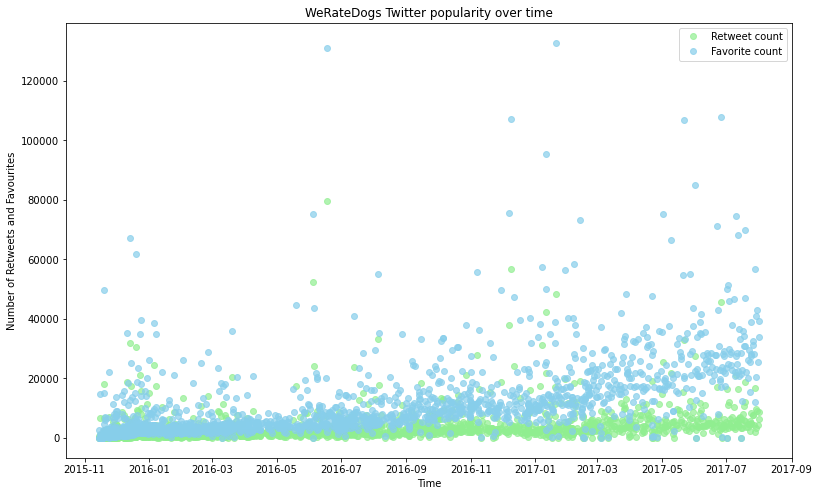

In [91]:
# visualising the number of retweets and favourites over time
plt.figure(figsize=(13,8))
plt.plot_date(df['tweet_date'],df['retweet_count'], color ='lightgreen', label='Retweet count', alpha = 0.7)
plt.plot_date(df['tweet_date'],df['favorite_count'], color ='skyblue', label='Favorite count', alpha = 0.7)
plt.xlabel('Time')
plt.locator_params(axis='x', nbins=5)
plt.ylabel('Number of Retweets and Favourites')
plt.title('WeRateDogs Twitter popularity over time')
plt.legend()
plt.show();

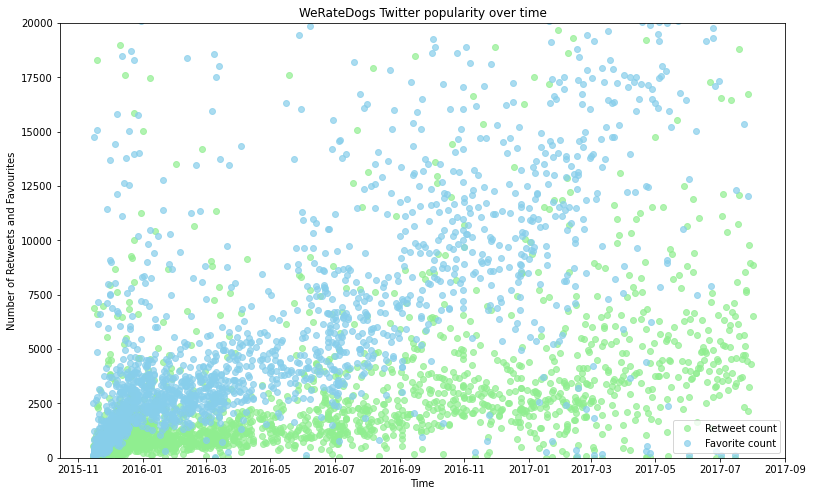

In [92]:
# creating the same visualisation but with y-axis limits
plt.figure(figsize=(13,8))
plt.plot_date(df['tweet_date'],df['retweet_count'], color ='lightgreen', label='Retweet count', alpha = 0.7)
plt.plot_date(df['tweet_date'],df['favorite_count'], color ='skyblue', label='Favorite count', alpha = 0.7)
plt.xlabel('Time')
plt.locator_params(axis='x', nbins=5)
plt.ylabel('Number of Retweets and Favourites')
plt.ylim([0,20000])
plt.title('WeRateDogs Twitter popularity over time')
plt.legend()
plt.show();

As can be seen from the two graphs above, WeRateDogs Twitter account has significantly grown over time.
* The number of favourites has almost always remained higher than the number of retweets over the late 2015 - late 2017 period.
* Between 2015-11 and 2016-05, the number of favourites was rarely above 5,000. However, after that, the number of favourites exploded, with tweets often getting more than 10,000 favourites
* A similar pattern could be observed for the retweet count. In the left half of the graph, the number of retweets rarely passes the 2,500 mark. Meanwhile, in the year 2017, it significantly increases, often reaching 5,000 or more retweets.

It could be said that these results were expected due to the fact that as the Twitter account grows in popularity, the number of favourites and retweets will increase. Moreover, it is not surprising that the amount of retweets is not as big as the number of favourites, as this is often the case. Users are more likely to favourite a tweet than to retweet it, and therefore these variations were expected as well.

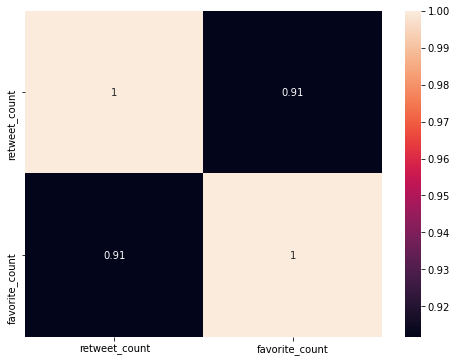

In [93]:
# creating a correlation matrix between retweet and favourite count
corrMatrix = df[['retweet_count', 'favorite_count']].corr()
plt.figure(figsize=(8,6))
sn.heatmap(corrMatrix, annot=True)
plt.show();

The above matrix shows that the number of retweets is indeed related to the number of favourites. With a correlation of 0.91, it is safe to say that the two metrics are strongly correlated with each other. Along with the previous graphs, this further suggests that as one metric grew, so did the other.

<a id='6.2'></a>
### 6.2 Investigating the relationship between dog stage and dog rating

It is clear from the previous section that WeRateDogs Twitter account is popular. And despite  WeRateDogs' rating system being inconsistent and sometimes confusing, it is possible that despite all dog being 'good dogs', some dogs could be more good than others. If this is the case, it could be hypothesised that dog characteristics could influence the rating given to the dog. 

A suitable variable to test this is the 'dog stage'. While this variable is hardly scientific, WeRateDogs often assing dog stages to the dogs they rate and even have a Dogtionary. Since WeRateDogs both rates the dogs and assigns dog stages, it could be hypothesised that a dog's stage could affect its rating. 

This is investigated in this section.

**Visualising the number of tweets with different dog stages.**

In [94]:
df.dog_stage.value_counts()

pupper     224
doggo      87 
puppo      24 
floofer    9  
Name: dog_stage, dtype: int64

In [95]:
df['dog_stage'].isna().sum()

1831

In [96]:
dog_stage_name = list(df.dog_stage.value_counts().index)
dog_stage_name.append('Not specified')

dog_stage_number = list(df.dog_stage.value_counts())
dog_stage_number.append(df['dog_stage'].isna().sum())

dog_stage_name, dog_stage_number

(['pupper', 'doggo', 'puppo', 'floofer', 'Not specified'],
 [224, 87, 24, 9, 1831])

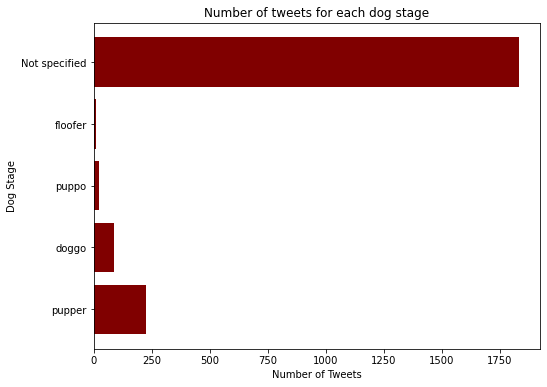

In [97]:
plt.figure(figsize=(8,6))
plt.barh(dog_stage_name, dog_stage_number, color ='maroon')
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Stage')
plt.title('Number of tweets for each dog stage');

The graph above shows that most tweets did not assign a dog stage. However, when the dog stage was assigned, the most popular dog stage was 'pupper'. Unfortunately, this also shows that the majority of tweets present in the dataset cannot be used in the analysis and therefore, there is always a possibility that the sample will not be representative of the population.

**Visualising the rating distribution for every dog stage.**

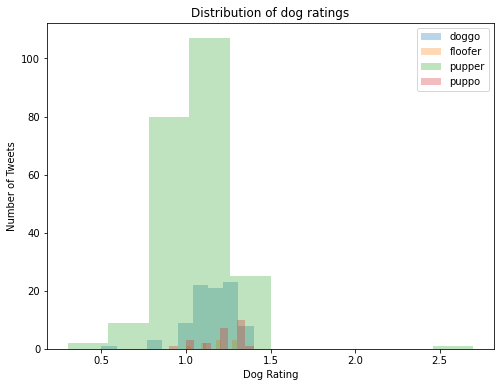

In [98]:
plt.figure(figsize=(8,6))
plt.hist(df.query("dog_stage == 'doggo'")['dog_rating'], alpha = 0.3, label = 'doggo')
plt.hist(df.query("dog_stage == 'floofer'")['dog_rating'], alpha = 0.3, label = 'floofer')
plt.hist(df.query("dog_stage == 'pupper'")['dog_rating'], alpha = 0.3, label = 'pupper')
plt.hist(df.query("dog_stage == 'puppo'")['dog_rating'], alpha = 0.3, label = 'puppo')
plt.xlabel('Dog Rating')
plt.ylabel('Number of Tweets')
plt.title('Distribution of dog ratings')
plt.legend();

Due to the large variation in the number of tweets for every dog stage, a similar visualisation will be made using boot sampling.

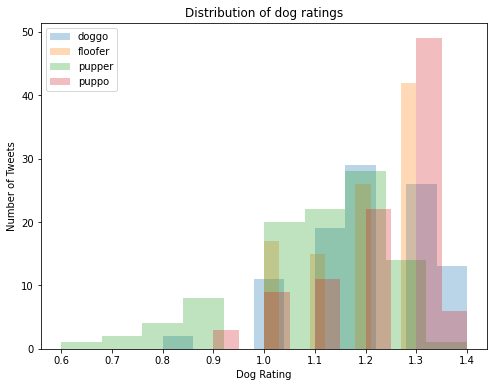

In [99]:
plt.figure(figsize=(8,6))
plt.hist(df.query("dog_stage == 'doggo'")['dog_rating'].sample(100, replace=True), alpha = 0.3, label = 'doggo')
plt.hist(df.query("dog_stage == 'floofer'")['dog_rating'].sample(100, replace=True), alpha = 0.3, label = 'floofer')
plt.hist(df.query("dog_stage == 'pupper'")['dog_rating'].sample(100, replace=True), alpha = 0.3, label = 'pupper')
plt.hist(df.query("dog_stage == 'puppo'")['dog_rating'].sample(100, replace=True), alpha = 0.3, label = 'puppo')
plt.xlabel('Dog Rating')
plt.ylabel('Number of Tweets')
plt.title('Distribution of dog ratings')
plt.legend();

While it is hard to understand the distribution of ratings from the first histogram, the second histogram shows that the dog ratings are similarly distributed. Nevertheless, since boot sampling is usually done with much larger samples and there were only 9 tweets available for the 'floofer' stage, this could once again be unrepresentative of the population.

**Investigating the average ratings for each dog stage.**

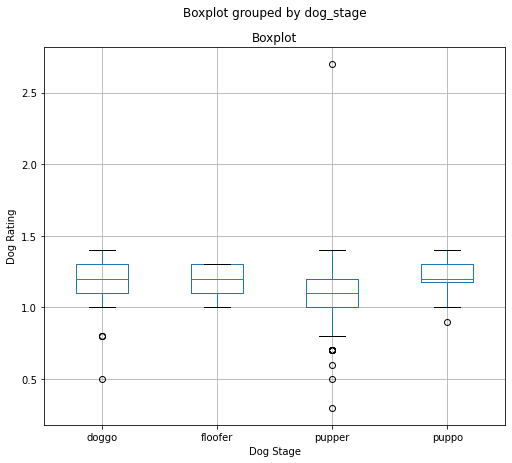

In [100]:
df[['dog_rating', 'dog_stage']].boxplot(by='dog_stage', figsize=(8,7))
plt.xlabel('Dog Stage')
plt.ylabel('Dog Rating')
plt.title('Boxplot');

In [101]:
df.groupby('dog_stage')['dog_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,87.0,1.177011,0.154544,0.5,1.100,1.2,1.3,1.4
floofer,9.0,1.188889,0.105409,1.0,1.100,1.2,1.3,1.3
pupper,224.0,1.080804,0.202534,0.3,1.000,1.1,1.2,2.7
puppo,24.0,1.204167,0.126763,0.9,1.175,1.2,1.3,1.4


Visualising the average ratings will help to understand if there are significant variations between every rating for different dog stages.The box plot above shows that there are some outliers in the data. However, taking into account the y-axis scale, these outliers are not very extreme and should be kept. Furthermore, in the case of outliers, due to the skewness of the data, the median is usually used. However, as can be seen from the descriptive statistics table above, the mean and median for the data are very similar. Therefore, there the traditional approach of using mean will be used.

In [102]:
df.groupby('dog_stage')['dog_rating'].mean()

dog_stage
doggo      1.177011
floofer    1.188889
pupper     1.080804
puppo      1.204167
Name: dog_rating, dtype: float64

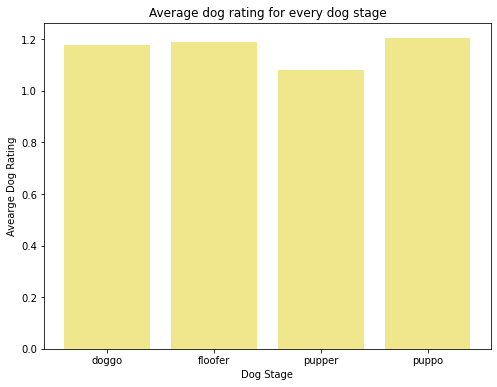

In [103]:
plt.figure(figsize=(8,6))
plt.bar(df.groupby('dog_stage')['dog_rating'].mean().index, 
        df.groupby('dog_stage')['dog_rating'].mean(), color ='khaki')
plt.xlabel('Dog Stage')
plt.ylabel('Avearge Dog Rating')
plt.title('Average dog rating for every dog stage');

As can be seen from the outputs above, the average rating for all 4 dog stages is relatively the same. Hence, from simply looking at the graph and the table, one could say that different dog stages will not result in different ratings, and thus, dog stages do not affect the dog ratings. However, regression will also be run to further explore this.

**Investigating the impact of dog stages on dog ratings through regression**

A copy of the clean data frame is created. This is done as dummy variable columns will have to be created to run the regression, and the original data frame should be kept clean for future use.

In [104]:
reg_df = df.copy()

In [105]:
reg_df['intercept'] = 1
dog_stage_dummies = pd.get_dummies(reg_df['dog_stage'])
reg_df = reg_df.join(dog_stage_dummies)
reg_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,3rd_pred_conf,3rd_pred_dog_breed,dog_breed,dog_breed_conf,tweet_date,intercept,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.076110,False,NaN,NaN,2017-08-01,1,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.068957,True,pekinese,0.323581,2017-08-01,1,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.031379,True,malamute,0.716012,2017-07-31,1,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.040836,False,labrador retriever,0.168086,2017-07-30,1,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.175219,True,german short-haired pointer,0.555712,2017-07-29,1,0,0,0,0


In [106]:
lm1 = sm.OLS(reg_df['dog_rating'], reg_df[['intercept', 'doggo', 'floofer', 'pupper']])
res1 = lm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dog_rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1040
Date:                Tue, 13 Apr 2021   Prob (F-statistic):              0.958
Time:                        21:08:13   Log-Likelihood:                -6231.3
No. Observations:                2175   AIC:                         1.247e+04
Df Residuals:                    2171   BIC:                         1.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2453      0.099     12.620      0.000       1.052       1.439
doggo         -0.0683      0.466     -0.147      0.883      -0.983       0.846
floofer       -0.0565      1.420     -0.040      0.968      -2.841       2.729
pupper        -0.1645      0.301     -0.547      0.584      -0.754       0.425
==============================================================================
Omnibus:                     6110.109   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177752635.919
Skew:                          35.458   Prob(JB):                         0.00
Kurtosis:                    1401.706   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression model output shows that the predicted difference in the ratings. For instance,  for a doggo stage dog and puppo stage dog, holding other variables constant, the predicted difference is expected to be -0.0683. This means that the doggo stage dog's rating is predicted to be 0.0683 less than the puppo stage dog. However, as can be seen from P>|t| column, none of these findings are statistically significant. All of those p-values are higher than the accepted alpha value under 95% confidence. Therefore it could be stated that no relationship was found between dog stage and dog rating.

<a id='6.3'></a>
### 6.3 Investigating the relationship between dog breed and the number of retweets and favourites

Following the logic from the previous section, it is possible that certain dog breeds will be more popular than others. However, instead of taking rating into account, the view of users will be considered. Twitter users are likely to be less subjective than the team behind WeRateDogs and could only favourite and retweet the breeds they like. Therefore it could be hypothesised that a dog's breed in the tweet could determine the number of retweets and favourites the tweet will get.

**Visualising all the unique dog breeds**

In [107]:
df.dog_breed.unique()

array([nan, 'pekinese', 'malamute', 'labrador retriever',
       'german short-haired pointer', 'irish terrier', 'border collie',
       'pomeranian', 'pembroke', 'samoyed', 'staffordshire bullterrier',
       'redbone', 'whippet', 'tibetan mastiff', 'siberian husky', 'pug',
       'weimaraner', 'rhodesian ridgeback', 'toy terrier', 'kuvasz',
       'french bulldog', 'shih-tzu', 'norwich terrier',
       'norwegian elkhound', 'miniature pinscher', 'golden retriever',
       'saluki', 'clumber', 'cocker spaniel', 'vizsla',
       'english springer', 'collie', 'welsh springer spaniel',
       'saint bernard', 'west highland white terrier', 'toy poodle',
       'newfoundland', 'sussex spaniel', 'shetland sheepdog', 'komondor',
       'kelpie', 'greater swiss mountain dog', 'groenendael',
       'lakeland terrier', 'boxer', 'bouvier des flandres', 'chihuahua',
       'tibetan terrier', 'italian greyhound', 'doberman', 'rottweiler',
       'malinois', 'entlebucher', 'standard poodle', 'york

In [108]:
len(df.dog_breed.unique())

103

In [109]:
df.dog_breed.value_counts()

labrador retriever      182
pembroke                98 
toy poodle              96 
pug                     77 
siberian husky          68 
                        .. 
japanese spaniel        1  
miniature poodle        1  
bouvier des flandres    1  
english foxhound        1  
basset                  1  
Name: dog_breed, Length: 102, dtype: int64

In [110]:
(df.dog_breed.value_counts() < 20).sum()

75

As can be seen from the output above, the vast majority of dog breeds have less than 20 tweets. This much less than the most popular dog breeds. Therefore, only the top 10 tweets will be used for the following analysis. 

**Visualising top 10 most popular dog breeds**

In [111]:
# top ten dog breeds
df.dog_breed.value_counts()[:10]

labrador retriever             182
pembroke                       98 
toy poodle                     96 
pug                            77 
siberian husky                 68 
staffordshire bullterrier      66 
pomeranian                     61 
samoyed                        50 
shetland sheepdog              43 
west highland white terrier    39 
Name: dog_breed, dtype: int64

In [112]:
df.dog_breed.isna().sum()

489

In [113]:
dog_breed_name = list(df.dog_breed.value_counts()[:10].index)
dog_breed_name.append('Not specified')

dog_breed_number = list(df.dog_breed.value_counts()[:10])
dog_breed_number.append(df['dog_breed'].isna().sum())

dog_breed_name, dog_breed_number

(['labrador retriever',
  'pembroke',
  'toy poodle',
  'pug',
  'siberian husky',
  'staffordshire bullterrier',
  'pomeranian',
  'samoyed',
  'shetland sheepdog',
  'west highland white terrier',
  'Not specified'],
 [182, 98, 96, 77, 68, 66, 61, 50, 43, 39, 489])

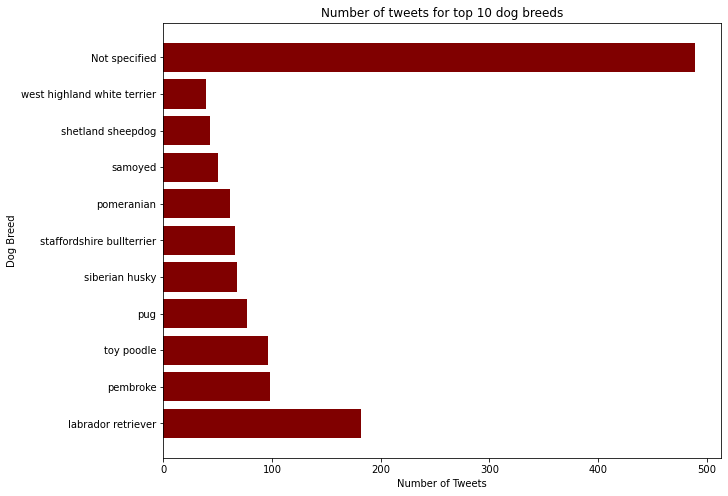

In [114]:
plt.figure(figsize=(10,8))
plt.barh(dog_breed_name, dog_breed_number, color ='maroon')
plt.xlabel("Number of Tweets")
plt.ylabel("Dog Breed")
plt.title("Number of tweets for top 10 dog breeds")

plt.show()

The graph above shows that most tweets did not have a predicted dog breed. However, when the dog breed was assigned, the most popular dog breed, by far, was 'labrador retriever'. Unfortunately, just like with the previous section 6.2, this also shows that the majority of tweets present in the dataset cannot be used in the analysis. 

**Visualising retweets and favourites of the top 10 dog breeds.**

In [115]:
# creating a new data frame to only contain the top 10 dog breeds
df_top_10_breeds = df[df['dog_breed'].isin(df.dog_breed.value_counts()[:10].index)]

In [116]:
df_top_10_breeds

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,1st_pred_dog_breed,2nd_prediction,2nd_pred_conf,2nd_pred_dog_breed,3rd_prediction,3rd_pred_conf,3rd_pred_dog_breed,dog_breed,dog_breed_conf,tweet_date
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,labrador retriever,0.168086,2017-07-30
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,True,eskimo dog,0.178406,True,pembroke,0.076507,True,pomeranian,0.566142,2017-07-28
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,pembroke,0.511319,2017-07-26
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",...,True,pomeranian,0.013884,True,chow,0.008167,True,samoyed,0.957979,2017-07-26
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,...,True,labrador retriever,0.151317,True,muzzle,0.082981,False,labrador retriever,0.377417,2017-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,666428276349472768,NaN,NaN,2015-11-17 01:30:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276349472768/photo/1,...,True,chow,0.249394,True,pomeranian,0.241878,True,pomeranian,0.371361,2015-11-17
2150,666353288456101888,NaN,NaN,2015-11-16 20:32:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288456101888/photo/1,...,True,siberian husky,0.147655,True,eskimo dog,0.093412,True,siberian husky,0.336874,2015-11-16
2151,666345417576210432,NaN,NaN,2015-11-16 20:01:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417576210432/

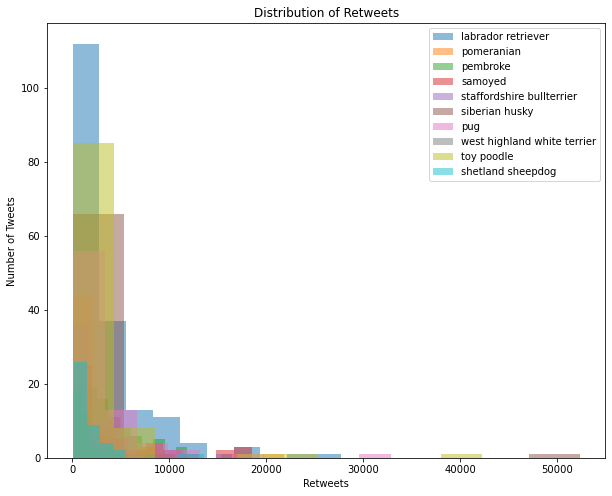

In [117]:
top_10_breeds = list(df_top_10_breeds.dog_breed.unique())

plt.figure(figsize=(10,8))

for breed in top_10_breeds:
    plt.hist(df_top_10_breeds[df_top_10_breeds['dog_breed'] == breed]
        ['retweet_count'], alpha = 0.5, label = breed)

plt.xlabel('Retweets')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Retweets')
plt.legend();

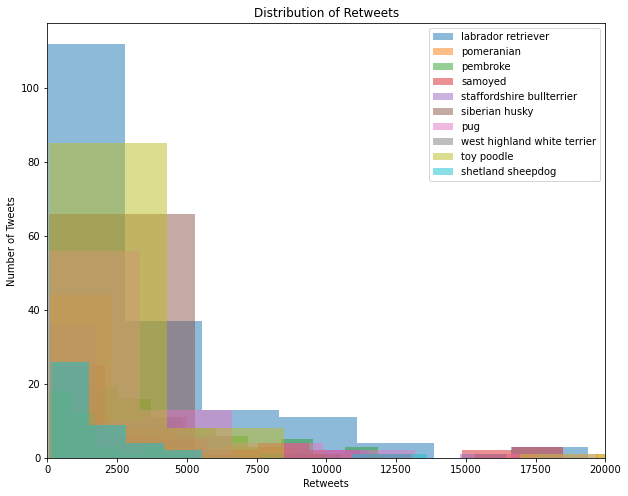

In [118]:
plt.figure(figsize=(10,8))

for breed in top_10_breeds:
    plt.hist(df_top_10_breeds[df_top_10_breeds['dog_breed'] == breed]
        ['retweet_count'], alpha = 0.5, label = breed)

plt.xlabel('Retweets')
plt.xlim([0,20000])
plt.ylabel('Number of Tweets')
plt.title('Distribution of Retweets')
plt.legend();

Both the overall and the zoomed-in histograms show that the distribution of the number of retweets for some of the dog breeds seems similar; however, simply looking at the histograms visually, not every dog breed is similar. For instance, the Siberian husky distribution seems to be wider spread out.

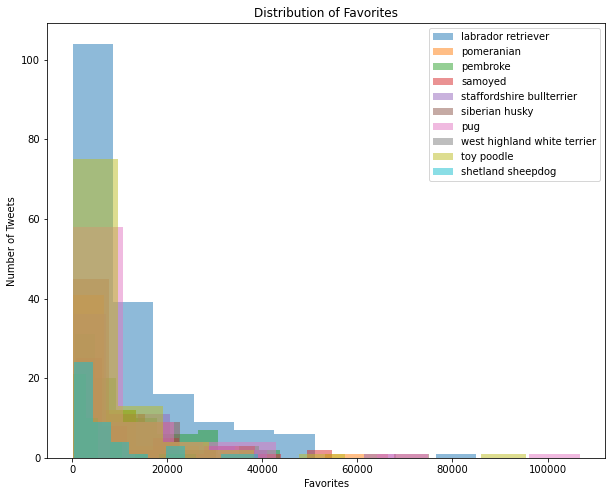

In [119]:
plt.figure(figsize=(10,8))

for breed in top_10_breeds:
    plt.hist(df_top_10_breeds[df_top_10_breeds['dog_breed'] == breed]
        ['favorite_count'], alpha = 0.5, label = breed)

plt.xlabel('Favorites')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Favorites')
plt.legend();

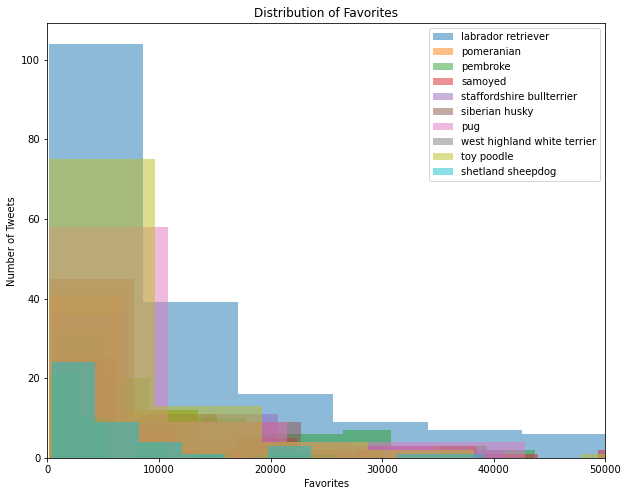

In [120]:
plt.figure(figsize=(10,8))

for breed in top_10_breeds:
    plt.hist(df_top_10_breeds[df_top_10_breeds['dog_breed'] == breed]
        ['favorite_count'], alpha = 0.5, label = breed)

plt.xlabel('Favorites')
plt.xlim([0,50000])
plt.ylabel('Number of Tweets')
plt.title('Distribution of Favorites')
plt.legend();

A similar situation can be observed for the favourites where both the overall and the zoomed-in histograms suggest that the distribution of the number of favourites for some of the dog breeds seems similar; however, simply looking at the histograms visually, not every dog breed is similar. 

**Investigating the median retweet and favourite counts for each dog breed.**

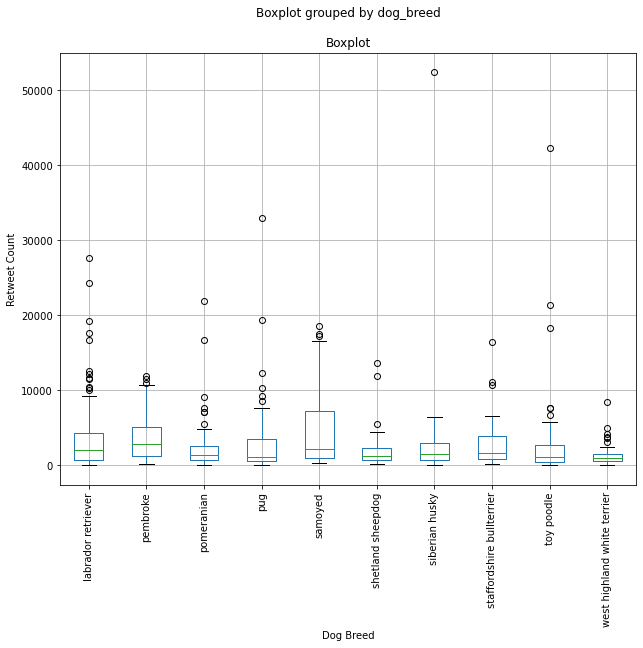

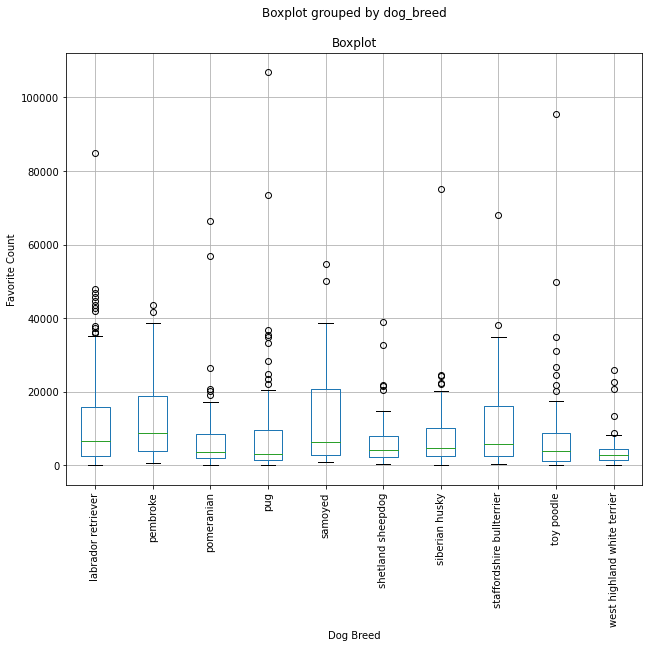

In [121]:
df_top_10_breeds[['dog_breed', 'retweet_count']].boxplot(by='dog_breed', figsize=(10,8))
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Boxplot')
plt.xticks(rotation=90);
df_top_10_breeds[['dog_breed', 'favorite_count']].boxplot(by='dog_breed', figsize=(10,8))
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Count')
plt.title('Boxplot')
plt.xticks(rotation=90);

In [122]:
df_top_10_breeds.groupby('dog_breed')[['retweet_count', 'favorite_count']].describe()

retweet_count                                   \
                                    count         mean          std    min   
dog_breed                                                                    
labrador retriever           182.0         3365.692308  4129.203498  23.0    
pembroke                     98.0          3538.285714  2872.281923  218.0   
pomeranian                   61.0          2512.590164  3694.315689  90.0    
pug                          77.0          2833.103896  4725.149459  47.0    
samoyed                      50.0          4583.280000  5191.313770  239.0   
shetland sheepdog            43.0          2010.581395  2681.998511  137.0   
siberian husky               68.0          2666.750000  6295.267382  77.0    
staffordshire bullterrier    66.0          2686.121212  2861.003533  96.0    
toy poodle                   96.0          2502.104167  5138.898972  63.0    
west highland white terrier  39.0          1440.666667  1664.439962  45.0    

                                                               favorite_count  \
                                 25%     50%      75%      max          count   
dog_breed                                                                       
labrador retriever           737.25   2088.0  4231.00  27680.0  182.0           
pembroke                     1255.50  2828.5  5125.00  11848.0  98.0            
pomeranian                   650.00   1379.0  2511.00  21840.0  61.0            
pug                          573.00   1069.0  3540.00  32883.0  77.0            
samoyed                      909.50   2126.0  7181.00  18497.0  50.0            
shetland sheepdog            671.50   1262.0  2331.00  13616.0  43.0            
siberian husky               701.50   1494.0  3020.50  52360.0  68.0            
staffordshire bullterrier    873.00   1655.0  3838.75  16439.0  66.0            
toy poodle                   428.25   1126.0  2707.25  42228.0  96.0            
west highland white terrier  570.00   917.0   1499.50  8476.0   39.0            

                                                                         \
                                     mean           std    min      25%   
dog_breed                                                                 
labrador retriever           11312.560440  12613.483162  107.0  2511.50   
pembroke                     12323.367347  10583.908140  592.0  3847.50   
pomeranian                   7633.426230   11578.888586  171.0  1914.00   
pug                          9357.376623   16292.568420  121.0  1544.00   
samoyed                      12902.340000  13878.511875  806.0  2908.00   
shetland sheepdog            6984.186047   8438.969033   452.0  2213.00   
siberian husky               8300.558824   10482.240144  229.0  2484.25   
staffordshire bullterrier    10704.818182  11805.195139  327.0  2636.50   
toy poodle                   7503.864583   12244.412505  152.0  1192.50   
west highland white terrier  4768.948718   6088.874029   238.0  1578.00   

                                                         
                                50%       75%       max  
dog_breed                                                
labrador retriever           6737.0  15851.00  85011.0   
pembroke                     8696.0  18738.75  43710.0   
pomeranian                   3676.0  8655.00   66437.0   
pug                          2972.0  9717.00   106827.0  
samoyed                      6373.0  20713.75  54720.0   
shetland sheepdog            4078.0  8004.50   39090.0   
siberian husky               4737.5  10232.50  75163.0   
staffordshire bullterrier    5736.0  16083.75  68152.0   
toy poodle                   3835.0  8720.25   95450.0   
west highland white terrier  2730.0  4337.50   26022.0

As can be seen from both box plots above, for both the retweet and favourite counts, there are significant outliers in the dataset. Moreover, looking at the table of descriptive statistics, there are significant differences between the mean and the median. This suggests the mean could be seen as unreliable in this case, and therefore the median statistic will be used instead.

In [123]:
df_top_10_breeds.groupby('dog_breed')[['retweet_count', 'favorite_count']].median()

,retweet_count,favorite_count
dog_breed,,
labrador retriever,2088.0,6737.0
pembroke,2828.5,8696.0
pomeranian,1379.0,3676.0
pug,1069.0,2972.0
samoyed,2126.0,6373.0
shetland sheepdog,1262.0,4078.0
siberian husky,1494.0,4737.5
staffordshire bullterrier,1655.0,5736.0
toy poodle,1126.0,3835.0


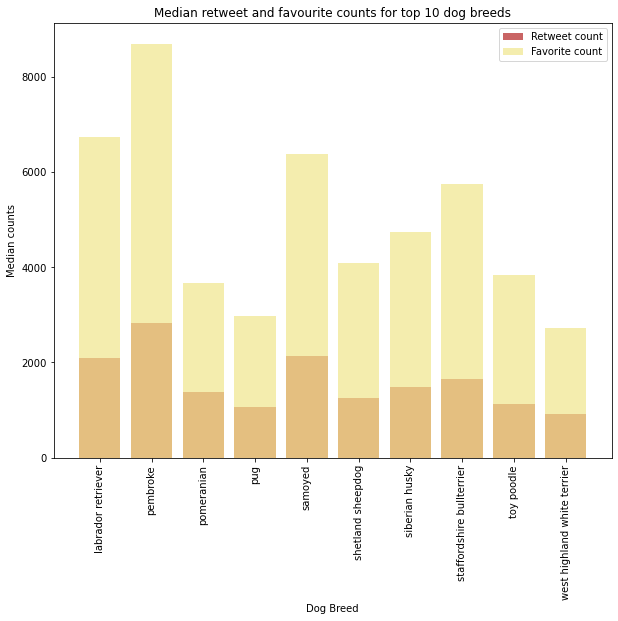

In [124]:
plt.figure(figsize=(10,8))
plt.bar(df_top_10_breeds.groupby('dog_breed')['retweet_count'].median().index, 
        df_top_10_breeds.groupby('dog_breed')['retweet_count'].median(), color ='firebrick', alpha=0.7, 
        label='Retweet count')
plt.bar(df_top_10_breeds.groupby('dog_breed')['favorite_count'].median().index, 
        df_top_10_breeds.groupby('dog_breed')['favorite_count'].median(), color ='khaki', alpha=0.7,
        label='Favorite count')
plt.xlabel('Dog Breed')
plt.xticks(rotation=90)
plt.ylabel('Median counts')
plt.title('Median retweet and favourite counts for top 10 dog breeds')
plt.legend();

The bar graph above shows that there are indeed observable differences between dog breeds and the median retweet and favourite counts. However, this is not true for all breeds. For instance, samoyed and Labrador retriever have almost identical counts. Pembroke is the dog breed with the highest median favourite count (8696) and median retweet count (2828.5). Similarly, west highland white terrier dog breed had the lowest median favourite count (2730) and median retweet count (917). Therefore a regression will be used to further investigate this.

**Investigating the impact of dog breeds on retweet and favourite counts through regression**

In [125]:
# creating another copy data frame for regression dummy variable coding
reg_df2 = df_top_10_breeds.copy()
reg_df2['intercept'] = 1
dog_stage_dummies = pd.get_dummies(reg_df2['dog_breed'])
reg_df2 = reg_df2.join(dog_stage_dummies)
reg_df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,labrador retriever,pembroke,pomeranian,pug,samoyed,shetland sheepdog,siberian husky,staffordshire bullterrier,toy poodle,west highland white terrier
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,0,0,0,0,0,0,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,0,0,1,0,0,0,0,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,...,0,1,0,0,0,0,0,0,0,0
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",...,0,0,0,0,1,0,0,0,0,0
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,...,1,0,0,0,0,0,0,0,0,0


In [126]:
reg_col =reg_df2.columns[-11:-1]

In [127]:
lm2 = sm.OLS(reg_df2['retweet_count'], reg_df2[reg_df2.columns[-11:-1]])
res2 = lm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.275
Date:                Tue, 13 Apr 2021   Prob (F-statistic):             0.0162
Time:                        21:08:14   Log-Likelihood:                -7616.1
No. Observations:                 780   AIC:                         1.525e+04
Df Residuals:                     770   BIC:                         1.530e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                  1440.6667    678.534      2.123      0.034     108.670    2772.664
labrador retriever         1925.0256    747.709      2.575      0.010     457.237    3392.815
pembroke                   2097.6190    802.267      2.615      0.009     522.728    3672.510
pomeranian                 1071.9235    868.774      1.234      0.218    -633.524    2777.371
pug                        1392.4372    832.828      1.672      0.095    -242.446    3027.321
samoyed                    3142.6133    905.278      3.471      0.001    1365.508    4919.719
shetland sheepdog           569.9147    937.011      0.608      0.543   -1269.484    2409.314
siberian husky             1226.0833    851.156      1.440      0.150    -444.779    2896.946
staffordshire bullterrier  1245.4545    855.844      1.455      0.146    -434.610    2925.519
toy poodle                 1061.4375    804.643      1.319      0.188    -518.116    2640.991
==============================================================================
Omnibus:                      839.795   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58392.385
Skew:                           5.059   Prob(JB):                         0.00
Kurtosis:                      44.162   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table shows the results from a regression model constructed for retweet count variable is structured in the same way as the previous section. It also illustrates interesting results. Firstly, under the 95% confidence level, not all of the findings are statistically significant. However, the p-values for labrador retriever, pembroke and samoyed breeds have a lower p-value than the accepted alpha value of 0.025 and therefore could be considered statistically significant. Taking this into consideration, it could be said that these particular breeds, could be used to predict the number of retweets. However, only 10 breeds were considered within the regression model, and hence it is still hard to say if the dog breed indeed affects the retweet count. A larger dataset with more breeds should be used in future work.

In [128]:
lm3 = sm.OLS(reg_df2['favorite_count'], reg_df2[reg_df2.columns[-11:-1]])
res3 = lm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.937
Date:                Tue, 13 Apr 2021   Prob (F-statistic):            0.00196
Time:                        21:08:14   Log-Likelihood:                -8433.3
No. Observations:                 780   AIC:                         1.689e+04
Df Residuals:                     770   BIC:                         1.693e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                  4768.9487   1934.513      2.465      0.014     971.404    8566.493
labrador retriever         6543.6117   2131.729      3.070      0.002    2358.922    1.07e+04
pembroke                   7554.4186   2287.277      3.303      0.001    3064.380     1.2e+04
pomeranian                 2864.4775   2476.890      1.156      0.248   -1997.780    7726.735
pug                        4588.4279   2374.407      1.932      0.054     -72.652    9249.507
samoyed                    8133.3913   2580.962      3.151      0.002    3066.835    1.32e+04
shetland sheepdog          2215.2373   2671.433      0.829      0.407   -3028.918    7459.393
siberian husky             3531.6101   2426.661      1.455      0.146   -1232.045    8295.265
staffordshire bullterrier  5935.8695   2440.025      2.433      0.015    1145.979    1.07e+04
toy poodle                 2734.9159   2294.050      1.192      0.234   -1768.418    7238.250
==============================================================================
Omnibus:                      542.832   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7804.116
Skew:                           3.012   Prob(JB):                         0.00
Kurtosis:                      17.277   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table shows the results from a regression model constructed for the favourite count variable. Interestingly, just like with the previous regression model, most breeds have a p-value smaller than the accepted alpha value. More precisely,  only pometarian, pug, Shetland sheepdog and siberian husky breeds have higher p-values alpha value of 0.025 and therefore could not be considered statistically significant. Overall, the same breeds that have a statistically significant result for retweet counts have also statistically significant results for retweet counts, with Siberian husky being the only exception to this. However, once again, only 10 breeds were considered within the regression model, and hence it is still hard to say if the dog breed indeed affects the retweet count. A larger dataset with more breeds should be used in future work.